In [10]:
%matplotlib notebook
import sys
sys.path.append('../source/')
from trader import Trader
from entrymodels import ABC
from exitmodels import StopOrTarget
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as pl

# LWSA3 - Optimising params

**Best results**: ABC:s1t1.5 and ABC:s1t4R\
Period: 2020-02-06 -> 2020-12-30\
Avg time in: 25 days\
pnl: 50% in 17 trades\
Winning rate: 64%

#### Account
**Capital**: 20000 \
**Risk**: 200 \
**Fees**: 5.5 \
\
**Equity**: LWSA3 \
**Period**: $1^{st}$ Jan 2019\
**Trading Strategy**: ABC \
**Entry point**: BO on signal bar or B high. \
**Stop loss**: Under C with tested factors (1, 1.2, 1.3, 1.4, 1.5) \
**Target**: Tested - AB projection with different factors or risk projection with factors (2, 3, 4)\
**Trail**: Tested - No or Raised to BE after price reach 2:1 on RR 

In [13]:
stopPos = [1, 1.2, 1.4, 1.5]
trgPos = [1, 1.2, 1.4, 1.5]

end = datetime.today()
start = datetime(day=6, month=2, year=2020)

Trader.loadportfolio(portfolio=['LWSA3.SA'], start=start, end=end)
trader = {}
summary = pd.DataFrame()
history = pd.DataFrame()
for stop in stopPos:
    for trg in trgPos:
        ABC.settings({
             'stop': {'position': 'C', 'factor': stop},
             'target': {'projection': 'AB', 'factor': trg},
             'selectCriteria': 'sma21',
             'name': f'ABC:s{stop}t{trg}'
        })
#         trader[ABC.name] = Trader(risk_size=200, target_size=600, capital=20000, fees=5.5)
        trader[ABC.name] = Trader()
        trader[ABC.name].new(risk_size=200, target_size=600, capital=20000, fees=5.5)
#         trader[ABC.name].backtest(ABC, StopOrTarget, updaterisk=False, trail=False)
        trader[ABC.name].backtest(ABC, updaterisk=False, trail=False)
        
        summary = summary.append(pd.DataFrame(trader[ABC.name].summary()).T)
        history = history.append(trader[ABC.name].history())

for trg in [400, 600, 800]:
    ABC.settings({
         'stop': {'position': 'C', 'factor': 1},
         'target': {'projection': 'risk', 'factor': 1},
         'selectCriteria': 'sma21',
         'name': f'ABC:s1t{int(trg/200)}R'
    })
    trader[ABC.name] = Trader()
    trader[ABC.name].new(risk_size=200, target_size=trg, capital=20000, fees=5.5)
#     trader[ABC.name] = Trader(risk_size=200, target_size=trg, capital=20000, fees=5.5)
#     trader[ABC.name].backtest(ABC, StopOrTarget, updaterisk=False, trail=False)
    trader[ABC.name].backtest(ABC, updaterisk=False, trail=False)
    
    summary = summary.append(pd.DataFrame(trader[ABC.name].summary()).T)
    history = history.append(trader[ABC.name].history())
summary.reset_index(inplace=True, drop=True)
# SMA21
ABC.settings({
    'stop': {'position': 'C', 'factor': 1},
    'target': {'projection': 'AB', 'factor': 1.5},
    'selectCriteria': 'sma21',
    'name': f'ABC:s1t1.5sma21'
})
trader[ABC.name] = Trader()
trader[ABC.name].new(risk_size=200, target_size=trg, capital=20000, fees=5.5)

trader[ABC.name].backtest(ABC, updaterisk=False, trail=False)
# trader[ABC.name].backtest(ABC, StopOrTarget, updaterisk=False, trail=False)
summary = summary.append(pd.DataFrame(trader[ABC.name].summary()).T)
history = history.append(trader[ABC.name].history())
# Trail
ABC.settings({
    'stop': {'position': 'C', 'factor': 1},
    'target': {'projection': 'AB', 'factor': 1.5},
    'selectCriteria': 'sma21',
    'name': f'ABC:s1t1.5sma21_trail'
})
trader[ABC.name] = Trader()
trader[ABC.name].new(risk_size=200, target_size=trg, capital=20000, fees=5.5)
# trader[ABC.name].backtest(ABC, StopOrTarget, updaterisk=False, trail=True)
trader[ABC.name].backtest(ABC, updaterisk=False, trail=True)

summary = summary.append(pd.DataFrame(trader[ABC.name].summary()).T)
history = history.append(trader[ABC.name].history())
summary.reset_index(inplace=True, drop=True)  


        

LWSA3.SA: 100%|██████████| 1/1 [00:01<00:00,  1.08s/ticker]


2020-04-06 00:00:00: LWSA3.SA entry=4.33, stop=3.33
2020-04-15 00:00:00: LWSA3.SA entry=4.92, stop=4.66
2020-04-27 00:00:00: LWSA3.SA entry=5.65, stop=5.03
2020-05-06 00:00:00: LWSA3.SA entry=5.83, stop=5.37
2020-05-18 00:00:00: LWSA3.SA entry=6.21, stop=5.62
2020-05-26 00:00:00: LWSA3.SA entry=6.43, stop=5.89
Profit!
2020-05-27 00:00:00: LWSA3.SA price=6.49
Profit!
2020-05-27 00:00:00: LWSA3.SA price=6.72
2020-06-02 00:00:00: LWSA3.SA entry=6.85, stop=6.12
Profit!
2020-06-02 00:00:00: LWSA3.SA price=6.93
Profit!
2020-06-03 00:00:00: LWSA3.SA price=7.19
Profit!
2020-06-03 00:00:00: LWSA3.SA price=7.03
Profit!
2020-06-03 00:00:00: LWSA3.SA price=7.27
Profit!
2020-06-10 00:00:00: LWSA3.SA price=7.79
2020-06-25 00:00:00: LWSA3.SA entry=9.17, stop=8.73
Profit!
2020-07-02 00:00:00: LWSA3.SA price=12.38
2020-07-09 00:00:00: LWSA3.SA entry=11.5, stop=10.94
2020-07-20 00:00:00: LWSA3.SA entry=11.41, stop=11.06
Loss...
2020-07-24 00:00:00: LWSA3.SA price=10.94
Loss...
2020-07-24 00:00:00: LWSA3

Profit!
2020-06-09 00:00:00: LWSA3.SA price=7.58
Profit!
2020-06-09 00:00:00: LWSA3.SA price=7.62
Profit!
2020-06-10 00:00:00: LWSA3.SA price=7.96
Profit!
2020-06-10 00:00:00: LWSA3.SA price=7.75
Profit!
2020-06-18 00:00:00: LWSA3.SA price=8.26
2020-06-25 00:00:00: LWSA3.SA entry=9.17, stop=8.73
2020-07-09 00:00:00: LWSA3.SA entry=11.5, stop=10.94
2020-07-20 00:00:00: LWSA3.SA entry=11.41, stop=11.06
Loss...
2020-07-24 00:00:00: LWSA3.SA price=10.94
Loss...
2020-07-24 00:00:00: LWSA3.SA price=11.06
Profit!
2020-08-06 00:00:00: LWSA3.SA price=13.72
2020-08-17 00:00:00: LWSA3.SA entry=13.35, stop=12.75
2020-08-24 00:00:00: LWSA3.SA entry=14.58, stop=13.82
2020-09-01 00:00:00: LWSA3.SA entry=15.57, stop=14.51
Loss...
2020-09-04 00:00:00: LWSA3.SA price=14.51
Loss...
2020-09-11 00:00:00: LWSA3.SA price=13.82
2020-10-08 00:00:00: LWSA3.SA entry=15.65, stop=14.91
2020-10-16 00:00:00: LWSA3.SA entry=17.45, stop=16.74
2020-10-22 00:00:00: LWSA3.SA entry=17.79, stop=17.02
Loss...
2020-10-28 00:

2020-07-20 00:00:00: LWSA3.SA entry=11.41, stop=10.99
Loss...
2020-07-24 00:00:00: LWSA3.SA price=10.83
Loss...
2020-07-24 00:00:00: LWSA3.SA price=10.99
Profit!
2020-08-06 00:00:00: LWSA3.SA price=13.41
2020-08-17 00:00:00: LWSA3.SA entry=13.35, stop=12.63
2020-08-24 00:00:00: LWSA3.SA entry=14.58, stop=13.668000000000001
2020-09-01 00:00:00: LWSA3.SA entry=15.57, stop=14.298
Profit!
2020-09-03 00:00:00: LWSA3.SA price=17.07
Loss...
2020-09-04 00:00:00: LWSA3.SA price=14.3
2020-10-08 00:00:00: LWSA3.SA entry=15.65, stop=14.762
2020-10-16 00:00:00: LWSA3.SA entry=17.45, stop=16.598
2020-10-22 00:00:00: LWSA3.SA entry=17.79, stop=16.866
Loss...
2020-10-28 00:00:00: LWSA3.SA price=16.6
Loss...
2020-10-28 00:00:00: LWSA3.SA price=16.87
Profit!
2020-11-03 00:00:00: LWSA3.SA price=18.33
Profit!
2020-11-04 00:00:00: LWSA3.SA price=18.89
2020-12-17 00:00:00: LWSA3.SA entry=17.08, stop=16.228
Profit!
2020-12-21 00:00:00: LWSA3.SA price=18.89
2021-01-11 00:00:00: LWSA3.SA entry=20.83, stop=19.0

Profit!
2020-09-02 00:00:00: LWSA3.SA price=16.72
Loss...
2020-09-11 00:00:00: LWSA3.SA price=14.09
2020-10-08 00:00:00: LWSA3.SA entry=15.65, stop=14.614
2020-10-16 00:00:00: LWSA3.SA entry=17.45, stop=16.456
Profit!
2020-10-19 00:00:00: LWSA3.SA price=17.62
2020-10-22 00:00:00: LWSA3.SA entry=17.79, stop=16.712
Loss...
2020-10-28 00:00:00: LWSA3.SA price=16.46
Loss...
2020-10-28 00:00:00: LWSA3.SA price=16.71
Profit!
2020-11-03 00:00:00: LWSA3.SA price=18.43
2020-12-17 00:00:00: LWSA3.SA entry=17.08, stop=16.086000000000002
Profit!
2020-12-21 00:00:00: LWSA3.SA price=18.63
2021-01-11 00:00:00: LWSA3.SA entry=20.83, stop=18.729999999999997
Profit!
2021-01-14 00:00:00: LWSA3.SA price=26.16
2021-01-21 00:00:00: LWSA3.SA entry=28.35, stop=25.214
2021-01-26 00:00:00: LWSA3.SA entry=29.46, stop=27.962
Loss...
2021-01-26 00:00:00: LWSA3.SA price=27.96
Loss...
2021-01-27 00:00:00: LWSA3.SA price=25.21
2021-02-19 00:00:00: LWSA3.SA entry=31.76, stop=25.964000000000002
2021-02-25 00:00:00: LWS

2020-10-08 00:00:00: LWSA3.SA entry=15.65, stop=14.54
2020-10-16 00:00:00: LWSA3.SA entry=17.45, stop=16.384999999999998
Profit!
2020-10-26 00:00:00: LWSA3.SA price=17.96
Loss...
2020-10-28 00:00:00: LWSA3.SA price=16.38
2020-12-17 00:00:00: LWSA3.SA entry=17.08, stop=16.015
Profit!
2020-12-18 00:00:00: LWSA3.SA price=18.37
2021-01-11 00:00:00: LWSA3.SA entry=20.83, stop=18.58
Profit!
2021-01-13 00:00:00: LWSA3.SA price=25.27
2021-01-21 00:00:00: LWSA3.SA entry=28.35, stop=24.99
2021-01-26 00:00:00: LWSA3.SA entry=29.46, stop=27.855
Loss...
2021-01-26 00:00:00: LWSA3.SA price=27.86
Loss...
2021-01-27 00:00:00: LWSA3.SA price=24.99
2021-02-19 00:00:00: LWSA3.SA entry=31.76, stop=25.55
2021-02-25 00:00:00: LWSA3.SA entry=32.16, stop=29.64
Loss...
2021-02-25 00:00:00: LWSA3.SA price=29.64
Loss...
2021-03-03 00:00:00: LWSA3.SA price=25.55
2021-04-06 00:00:00: LWSA3.SA entry=25.5, stop=22.86
2021-04-13 00:00:00: LWSA3.SA entry=26.49, stop=24.540000000000003
2021-04-19 00:00:00: LWSA3.SA ent

2020-10-08 00:00:00: LWSA3.SA entry=15.65, stop=14.54
Profit!
2020-10-14 00:00:00: LWSA3.SA price=17.25
2020-10-16 00:00:00: LWSA3.SA entry=17.45, stop=16.384999999999998
2020-10-22 00:00:00: LWSA3.SA entry=17.79, stop=16.634999999999998
Loss...
2020-10-28 00:00:00: LWSA3.SA price=16.38
Loss...
2020-10-28 00:00:00: LWSA3.SA price=16.63
Profit!
2020-11-04 00:00:00: LWSA3.SA price=18.8
Profit!
2020-11-04 00:00:00: LWSA3.SA price=19.12
2020-12-17 00:00:00: LWSA3.SA entry=17.08, stop=16.015
Profit!
2020-12-23 00:00:00: LWSA3.SA price=19.02
2021-01-11 00:00:00: LWSA3.SA entry=20.83, stop=18.58
Profit!
2021-01-15 00:00:00: LWSA3.SA price=27.49
2021-01-21 00:00:00: LWSA3.SA entry=28.35, stop=24.99
2021-01-26 00:00:00: LWSA3.SA entry=29.46, stop=27.855
Loss...
2021-01-26 00:00:00: LWSA3.SA price=27.86
Loss...
2021-01-27 00:00:00: LWSA3.SA price=24.99
2021-02-19 00:00:00: LWSA3.SA entry=31.76, stop=25.55
2021-02-25 00:00:00: LWSA3.SA entry=32.16, stop=29.64
Loss...
2021-02-25 00:00:00: LWSA3.SA

2020-06-02 00:00:00: LWSA3.SA entry=6.85, stop=6.12
Using trader target.
Profit!
2020-06-10 00:00:00: LWSA3.SA price=7.75
Profit!
2020-06-16 00:00:00: LWSA3.SA price=8.13
Profit!
2020-06-18 00:00:00: LWSA3.SA price=8.33
Profit!
2020-06-19 00:00:00: LWSA3.SA price=8.57
Profit!
2020-06-19 00:00:00: LWSA3.SA price=8.59
2020-06-25 00:00:00: LWSA3.SA entry=9.17, stop=8.73
Using trader target.
Profit!
2020-06-25 00:00:00: LWSA3.SA price=9.77
Profit!
2020-06-30 00:00:00: LWSA3.SA price=10.93
2020-07-09 00:00:00: LWSA3.SA entry=11.5, stop=10.94
Using trader target.
2020-07-20 00:00:00: LWSA3.SA entry=11.41, stop=11.06
Using trader target.
Loss...
2020-07-24 00:00:00: LWSA3.SA price=10.94
Loss...
2020-07-24 00:00:00: LWSA3.SA price=11.06
2020-08-17 00:00:00: LWSA3.SA entry=13.35, stop=12.75
Using trader target.
2020-08-24 00:00:00: LWSA3.SA entry=14.58, stop=13.82
Using trader target.
Profit!
2020-08-26 00:00:00: LWSA3.SA price=15.75
2020-09-01 00:00:00: LWSA3.SA entry=15.57, stop=14.51
Using t

In [3]:
summary

,period,strategy,avg_time_in,total_trades,open_trades,pnl,pnl_percent,batting_avg,sharpe,liquid_cap,total_cap
0,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1t1],14.1923,26,0,5588.83,27.9442,0.5,3.09296,25588.8,25588.8
1,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1t1.2],18.4615,26,0,7157.12,35.7856,0.5,3.68027,27157.1,27157.1
2,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1t1.4],19.9615,26,0,8802.36,44.0118,0.5,4.29639,28802.4,28802.4
3,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1t1.5],21,26,0,8795.07,43.9754,0.461538,4.73484,28795.1,28795.1
4,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1.2t1],14.2692,26,0,4206.08,21.0304,0.5,2.57747,24206.1,24206.1
5,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1.2t1.2],18.5385,26,0,5513.37,27.5669,0.5,3.06776,25513.4,25513.4
6,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1.2t1.4],20.0385,26,0,6884.76,34.4238,0.5,3.58209,26884.8,26884.8
7,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1.2t1.5],21.0769,26,0,6846.68,34.2334,0.461538,3.94876,26846.7,26846.7
8,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1.4t1],14.8333,24,0,2833.01,14.1651,0.458333,2.43365,22833,22833
9,"[2020-02-06 00:00:00, 2021-05-31 00:00:00]",[ABC:s1.4t1.2],18.8846,26,0,4324.96,21.6248,0.5,2.61707,24325,24325


<IPython.core.display.Javascript object>


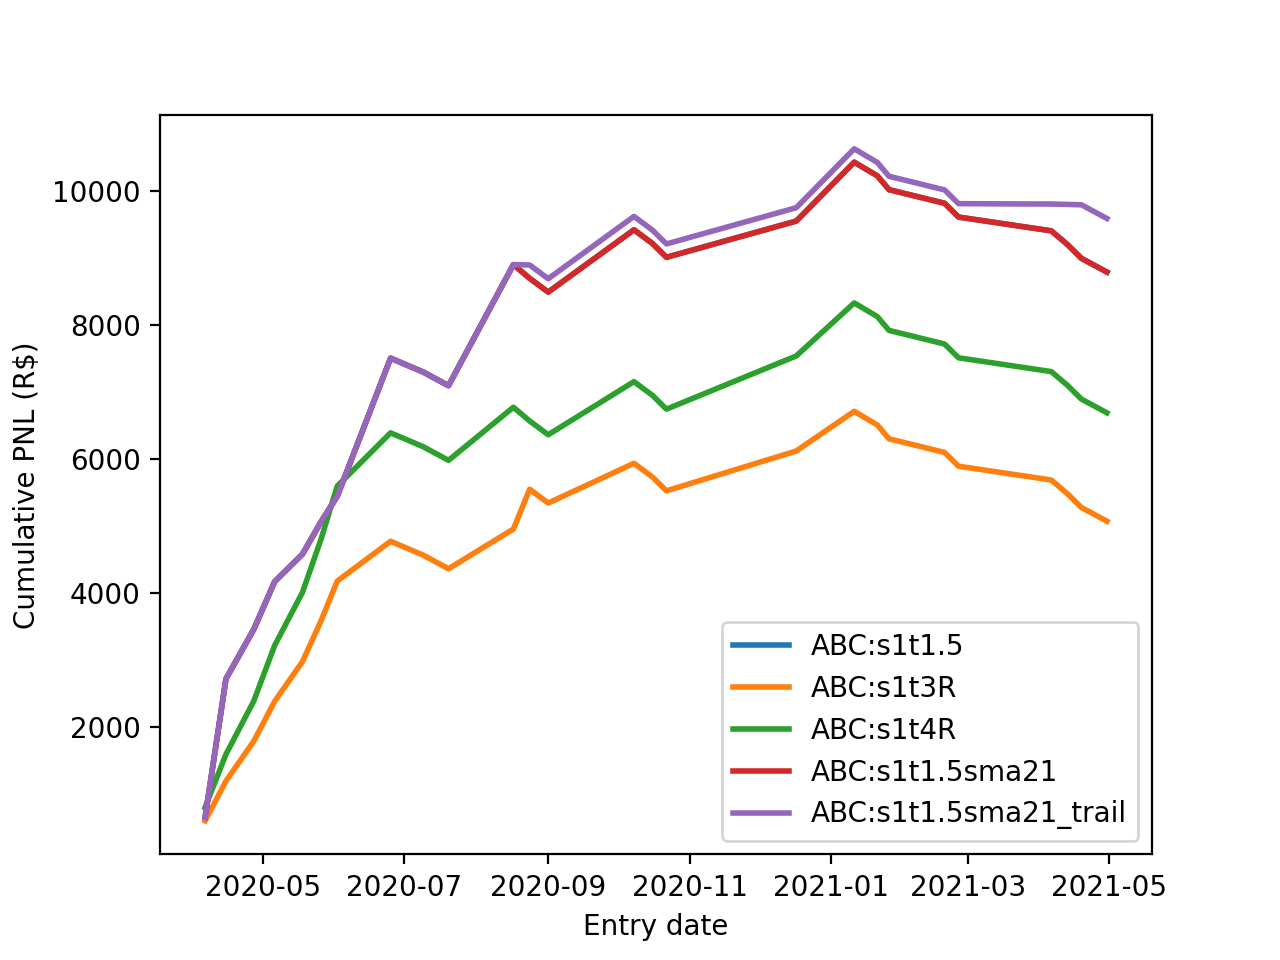

In [14]:
fig, ax = pl.subplots()
# for t in [1, 1.2, 1.4, 1.5, '2R', '3R', '4R']:
for t in [1.5, '3R', '4R', '1.5sma21', '1.5sma21_trail']:
    s = 1
    t = t
    results = history[history['strategy']==f'ABC:s{s}t{t}'].copy()
    ax.plot(
        results['entry_date'],
        results['pnl'].cumsum().fillna(method='ffill'),
        label=f'ABC:s{s}t{t}',
        linestyle='-',
        lw=2,
#         color=colours[cnt % len(colours)]
    )
ax.set_ylabel('Cumulative PNL (R$)')
ax.legend()
ax.set_xlabel('Entry date')
pl.show()

<IPython.core.display.Javascript object>


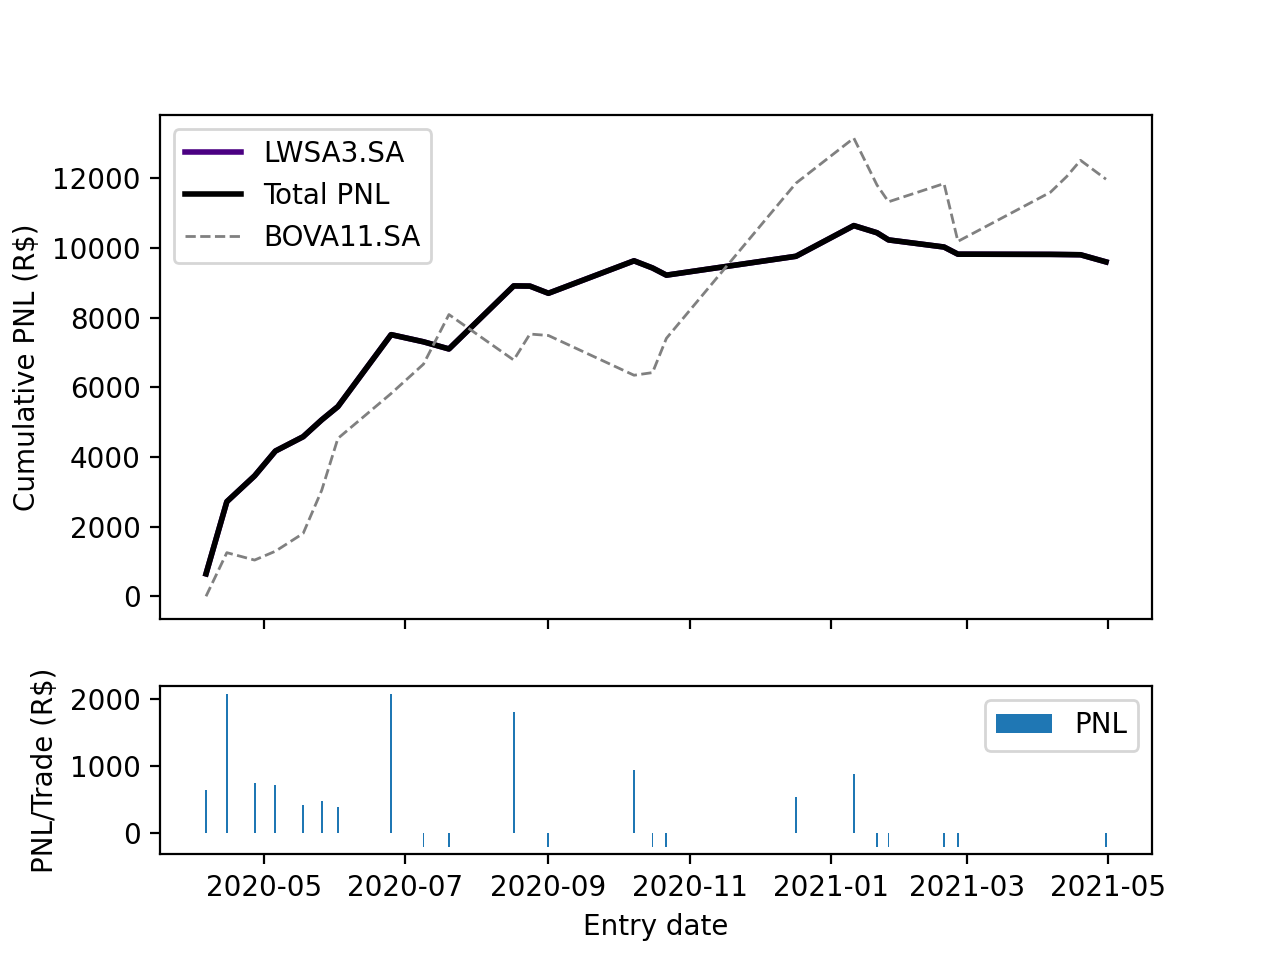

In [5]:
trader['ABC:s1t1.5sma21_trail'].performance(benchmark='BOVA11.SA')

In [15]:
trader['ABC:s1t1.5sma21_trail'].plottrades('LWSA3.SA')

In [8]:
trader['ABC:s1t1.5sma21_trail'].history()[trader['ABC:s1t1.5sma21_trail'].history().pnl>0]

,entry_date,strategy,ticker,entry,entry_vol,stop,target,status,exit,exit_vol,pnl,exit_date,time_in
0,2020-04-06,ABC:s1t1.5sma21_trail,LWSA3.SA,4.33,200.0,4.33,7.5775,sold,7.58,-200,644.5,2020-06-09 00:00:00,64 days
1,2020-04-15,ABC:s1t1.5sma21_trail,LWSA3.SA,4.92,769.0,4.92,7.61625,sold,7.62,-769,2070.8,2020-06-09 00:00:00,55 days
2,2020-04-27,ABC:s1t1.5sma21_trail,LWSA3.SA,5.65,323.0,5.65,7.95625,sold,7.96,-323,740.63,2020-06-10 00:00:00,44 days
3,2020-05-06,ABC:s1t1.5sma21_trail,LWSA3.SA,5.83,435.0,5.83,7.47625,sold,7.48,-435,712.25,2020-06-03 00:00:00,28 days
4,2020-05-18,ABC:s1t1.5sma21_trail,LWSA3.SA,6.21,339.0,5.62,7.43625,sold,7.44,-339,411.47,2020-06-03 00:00:00,16 days
5,2020-05-26,ABC:s1t1.5sma21_trail,LWSA3.SA,6.43,370.0,6.43,7.6825,sold,7.75,-370,482.9,2020-06-10 00:00:00,15 days
6,2020-06-02,ABC:s1t1.5sma21_trail,LWSA3.SA,6.85,274.0,6.12,8.26,sold,8.26,-274,380.84,2020-06-18 00:00:00,16 days
7,2020-06-25,ABC:s1t1.5sma21_trail,LWSA3.SA,9.17,455.0,9.17,13.715,sold,13.72,-455,2064.75,2020-08-06 00:00:00,42 days
10,2020-08-17,ABC:s1t1.5sma21_trail,LWSA3.SA,13.35,333.0,13.35,18.6863,sold,18.8,-333,1809.35,2020-11-04 00:00:00,79 days
13,2020-10-08,ABC:s1t1.5sma21_trail,LWSA3.SA,15.65,270.0,15.65,19.1225,sold,19.12,-270,931.4,2020-11-04 00:00:00,27 days


In [9]:
from datetime import datetime as dt
trader['ABC:s1t1.5sma21_trail'].history().loc[0, 'entry_date'] < dt.today()

True

In [11]:
(15+4+4+3+12+6+7)/8

6.375

In [13]:
(64+55+44+28+16+42+79+27+4+4)/10

36.3